In [187]:
import nltk
import string, pprint, os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

DOC_DIR="TEXTES"
text_list=[]
text_names=[]
question_list=[]
question_names=[]

def get_tokens(file):
    with open(file, 'r') as d:
        text = d.read()
        tokens = nltk.word_tokenize(clean_text(text))
        return tokens

def get_most_common_tokens(tokens, num):
    count = Counter(tokens)
    return count.most_common(num)

def clean_text(text):
        lowers = text.lower() #lower case for everyone
        #remove the punctuation using the character deletion step of translate
        punct_killer = str.maketrans('', '', string.punctuation)
        no_punctuation = lowers.translate(punct_killer)
        return no_punctuation

def get_text(file):
    with open(file, 'r') as d:
        text = d.read()
        return clean_text(text)
    
def tokenize(text):
    return nltk.word_tokenize(text)
    


def create_tfidf(dir):
    for subdir, dirs, files in os.walk(dir):
        for file in files:
            if file.endswith(".txt"):
                #print("treating "+file)
                file_path = subdir + os.path.sep + file
                #text_dict[file] = get_text(file_path)
                text_list.append(get_text(file_path))
                text_names.append(file)
                
def question_tfidf(dir):
    for subdir, dirs, files in os.walk(dir):
        for file in files:
            if file.endswith(".txt"):
                #print("treating "+file)
                file_path = subdir + os.path.sep + file
                #text_dict[file] = get_text(file_path)
                question_list.append(get_text(file_path))
                question_names.append(file)

def get_similarity(text1, text2, v):
    t1 = v.transform([text1])
    t2 = v.transform([text2])
    return cosine_similarity(t1,t2)

    
if __name__ == '__main__':
    #tokens = get_tokens('TEXTES/rd_12_psg_8_10.txt')
    #create_tfidf("TEXTES")
    create_tfidf("C:/Users/MyPC/Documents/AIC-partage/TC3/data/texts")
    v = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
    tfidfs = v.fit_transform(text_list)
    print(v.vocabulary_['located'])
    print(tfidfs[1143,2960])                        

    print(text_names.index("rd_16_psg_38_40.txt"))

    str1 = 'this sentence has unseen text such as computer but also king lord juliet'
    str2 = 'i love computer text'
    print(get_similarity(str1,str2,v))


2960
0.0
579
[[ 0.49557776]]


In [3]:
text_list[0]

'sent id100  and some predicted this would help build a new  larger audience for classical music  sent sent id101  such efforts have been successful to a point  leading to a string of highly popular crossover albums that topped pop charts  sent sent id102  a 1992 recording of henryk goreckis third symphony  a mournful work for soprano and orchestra by the contemporary polish composer  previously more cult figure than superstar  sold more than 1 million cds  sent'

In [188]:
tokens = nltk.word_tokenize(text_list[0])
clean_text_list = []
for t in text_list :
    clean_text_list.append(clean_text(t))

token_text_com =[]
token_text_tag =[]
for c in clean_text_list:
    token_text_com.append(    get_most_common_tokens(nltk.word_tokenize(c), 10))
    token_text_tag.append(nltk.pos_tag(tokenize(c)))
    
print(token_text_com[0]) 
print(token_text_tag[0])


cc =[]
for t in token_text_tag: 
    counts = Counter((word, tag) for word, tag in t)
    cc.append(counts.most_common)
print(cc[0])    

[('sent', 6), ('a', 5), ('and', 2), ('for', 2), ('to', 2), ('of', 2), ('more', 2), ('than', 2), ('id100', 1), ('some', 1)]
[('sent', 'NN'), ('id100', 'NN'), ('and', 'CC'), ('some', 'DT'), ('predicted', 'VBD'), ('this', 'DT'), ('would', 'MD'), ('help', 'VB'), ('build', 'VB'), ('a', 'DT'), ('new', 'JJ'), ('larger', 'JJR'), ('audience', 'NN'), ('for', 'IN'), ('classical', 'JJ'), ('music', 'NN'), ('sent', 'VBD'), ('sent', 'VBN'), ('id101', 'NNS'), ('such', 'JJ'), ('efforts', 'NNS'), ('have', 'VBP'), ('been', 'VBN'), ('successful', 'JJ'), ('to', 'TO'), ('a', 'DT'), ('point', 'NN'), ('leading', 'VBG'), ('to', 'TO'), ('a', 'DT'), ('string', 'NN'), ('of', 'IN'), ('highly', 'RB'), ('popular', 'JJ'), ('crossover', 'NN'), ('albums', 'NNS'), ('that', 'WDT'), ('topped', 'VBD'), ('pop', 'NN'), ('charts', 'NNS'), ('sent', 'VBD'), ('sent', 'VBN'), ('id102', 'NN'), ('a', 'DT'), ('1992', 'CD'), ('recording', 'NN'), ('of', 'IN'), ('henryk', 'NN'), ('goreckis', 'NNS'), ('third', 'JJ'), ('symphony', 'VBP')

In [48]:
data = clean_text_list[0]
print(data)
words = nltk.word_tokenize(data)
print(words)

sent id100  and some predicted this would help build a new  larger audience for classical music  sent sent id101  such efforts have been successful to a point  leading to a string of highly popular crossover albums that topped pop charts  sent sent id102  a 1992 recording of henryk goreckis third symphony  a mournful work for soprano and orchestra by the contemporary polish composer  previously more cult figure than superstar  sold more than 1 million cds  sent
['sent', 'id100', 'and', 'some', 'predicted', 'this', 'would', 'help', 'build', 'a', 'new', 'larger', 'audience', 'for', 'classical', 'music', 'sent', 'sent', 'id101', 'such', 'efforts', 'have', 'been', 'successful', 'to', 'a', 'point', 'leading', 'to', 'a', 'string', 'of', 'highly', 'popular', 'crossover', 'albums', 'that', 'topped', 'pop', 'charts', 'sent', 'sent', 'id102', 'a', '1992', 'recording', 'of', 'henryk', 'goreckis', 'third', 'symphony', 'a', 'mournful', 'work', 'for', 'soprano', 'and', 'orchestra', 'by', 'the', 'con

In [110]:
from nltk.corpus import wordnet

def get_wordnet_pos( treebank_tag):  # tag POS TAG to tag Wordnet  pour appliquer le lemmatizer
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def penn_to_wn(tag):
    return get_wordnet_pos(tag)

In [95]:
from nltk.corpus import stopwords
data = clean_text_list[0]
stopWords = set(stopwords.words('english'))
words = nltk.word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
        
        
#TODO RAJOUTER TAG AVEC MOT \ STOP WORDS 
#print(wordsFiltered)
words_sans_stop = [nltk.word_tokenize(w) for w in wordsFiltered ]

words_sans_stop_tag = [nltk.pos_tag(w) for w in words_sans_stop  ]
#print(words_sans_stop_tag)


def word_filtered (text):   # enlever les stop words de la liste pour garder les mots "intéressant"  , ex : on supprime les determeinant 
    stopWords = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    return wordsFiltered

def tag(text_en_list):
    return nltk.pos_tag(text_en_list)

def lemmatizer_list(tagged_list_words):  # on lemmatize les mots dans cette fonction 
    words=[]
    for word, tag in tagged_list_words:
        if penn_to_wn(tag) == '':
            words.append(word)
        else : 
            words.append(wordnet_lemmatizer.lemmatize(word,penn_to_wn(tag)))
    return words

def U_list(liste ):    # joindre les liste 
    liste_jointe = []
    for l in liste :
        liste_jointe = liste_jointe + l
    return liste_jointe

def U_String(liste): # joindre les string 
    liste_jointe=""
    
    for l in liste :
        liste_jointe = liste_jointe + l
    return liste_jointe

def cat(liste, n):        # ressort les categories les plus présentes 
    count = Counter(tag for w, tag in liste)
    return count.most_common(n)
                


mot_sans_sw = word_filtered(U_String(clean_text_list))  # recuperer string de tous les fichiers et enlever stop wors english
mot_sans_sw_tag = tag(mot_sans_sw) # POS taguer tous les mots 
list_lemm = lemmatizer_list((mot_sans_sw_tag))# lemmatiser tous les mots 
list_lemm_tag = tag(list_lemm)
mille_lem = get_most_common_tokens(list_lemm, 1000) # afficher les mots les plus fréquent jusqu'au 1000 eme
mille_lem_tag = get_most_common_tokens(list_lemm_tag, 1000) # afficher les mots les plus fréquent jusqu'au 1000 eme
categories =cat( list_lemm_tag, 15) # les categories les plus fréquentes , on a enlevé precedement stop words donc éfficace

print(mille_lem[0:20])      
print(mille_lem_tag[0:20])
print(categories)
            
        



[('send', 3384), ('sent', 1386), ('sentsent', 1174), ('lrb', 391), ('rrb', 391), ('music', 370), ('aid', 277), ('year', 242), ('ad', 235), ('one', 233), ('use', 211), ('make', 209), ('change', 208), ('country', 205), ('also', 179), ('disease', 175), ('us', 173), ('time', 163), ('emission', 157), ('water', 152)]
[(('send', 'NN'), 1408), (('sentsent', 'NN'), 887), (('send', 'VBP'), 774), (('send', 'VB'), 602), (('send', 'JJ'), 596), (('sent', 'VBD'), 497), (('music', 'NN'), 370), (('sent', 'JJ'), 358), (('sent', 'NN'), 355), (('rrb', 'NN'), 294), (('sentsent', 'JJ'), 266), (('aid', 'NN'), 250), (('year', 'NN'), 242), (('lrb', 'NN'), 237), (('ad', 'NN'), 235), (('one', 'CD'), 233), (('country', 'NN'), 205), (('change', 'NN'), 197), (('also', 'RB'), 179), (('use', 'NN'), 176)]
[('NN', 29917), ('JJ', 11505), ('VBP', 3263), ('RB', 2889), ('VB', 2152), ('CD', 2032), ('VBD', 1045), ('IN', 815), ('NNS', 811), ('MD', 460), ('VBN', 376), ('VBZ', 267), ('VBG', 211), ('PRP', 185), ('JJS', 150)]


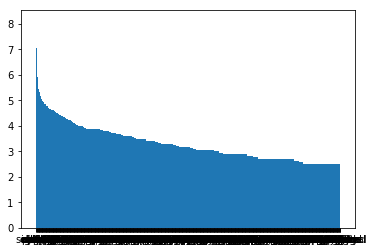

In [109]:
from collections import Counter   #graphe occurences termes 
import numpy as np
import matplotlib.pyplot as plt

ciquante_lem = get_most_common_tokens(list_lemm, 1000)
labels, values = zip(*ciquante_lem)

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, np.log(values), width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [176]:
#EX2
text0 =clean_text_list[0]+clean_text_list[1]
print(text0)

sent id100  and some predicted this would help build a new  larger audience for classical music  sent sent id101  such efforts have been successful to a point  leading to a string of highly popular crossover albums that topped pop charts  sent sent id102  a 1992 recording of henryk goreckis third symphony  a mournful work for soprano and orchestra by the contemporary polish composer  previously more cult figure than superstar  sold more than 1 million cds  sentsent id101  such efforts have been successful to a point  leading to a string of highly popular crossover albums that topped pop charts  sent sent id102  a 1992 recording of henryk goreckis third symphony  a mournful work for soprano and orchestra by the contemporary polish composer  previously more cult figure than superstar  sold more than 1 million cds  sent sent id103  even more successful was chant  recorded by benedictine monks in northern spain  sent


In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

def tokenize_(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems


tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')   #vectoriser 
tfs = tfidf.fit_transform(tokenize(text0))

In [182]:
top =get_most_common_tokens(tokenize(text0), 30)
counts = Counter (w for w in tokenize(text0))
print(top)
string = ""
for s, number in top :
    string = string +" "+ s 
    

response = tfidf.transform([string])
print (response)

[('sent', 10), ('a', 9), ('more', 5), ('to', 4), ('of', 4), ('than', 4), ('and', 3), ('for', 3), ('successful', 3), ('by', 3), ('id101', 2), ('such', 2), ('efforts', 2), ('have', 2), ('been', 2), ('point', 2), ('leading', 2), ('string', 2), ('highly', 2), ('popular', 2), ('crossover', 2), ('albums', 2), ('that', 2), ('topped', 2), ('pop', 2), ('charts', 2), ('id102', 2), ('1992', 2), ('recording', 2), ('henryk', 2)]
  (0, 50)	0.239544214321
  (0, 47)	0.225514846799
  (0, 46)	0.239544214321
  (0, 41)	0.176182189902
  (0, 40)	0.239544214321
  (0, 36)	0.239544214321
  (0, 35)	0.239544214321
  (0, 33)	0.239544214321
  (0, 25)	0.239544214321
  (0, 22)	0.239544214321
  (0, 21)	0.239544214321
  (0, 19)	0.239544214321
  (0, 18)	0.239544214321
  (0, 14)	0.239544214321
  (0, 12)	0.239544214321
  (0, 8)	0.239544214321
  (0, 2)	0.239544214321
  (0, 1)	0.239544214321


In [172]:
counts["sent"]

6

In [179]:
def list_to_dict(liste):
    attrs = {}
    for l in liste:
        attrs[l[0]] = l[1]
    return attrs 

#dict_counts = list_to_dict(counts)
#dict_top["sent"]

In [183]:
feature_names = tfidf.get_feature_names()   # plus fréquence élevé moins poid tfid élevé
for col in response.nonzero()[1]:
    print (feature_names[col], ' - ', response[0, col], " fréquence ", counts[feature_names[col]])

topped  -  0.239544214321  fréquence  2
successful  -  0.225514846799  fréquence  3
string  -  0.239544214321  fréquence  2
sent  -  0.176182189902  fréquence  10
recording  -  0.239544214321  fréquence  2
popular  -  0.239544214321  fréquence  2
pop  -  0.239544214321  fréquence  2
point  -  0.239544214321  fréquence  2
leading  -  0.239544214321  fréquence  2
id102  -  0.239544214321  fréquence  2
id101  -  0.239544214321  fréquence  2
highly  -  0.239544214321  fréquence  2
henryk  -  0.239544214321  fréquence  2
efforts  -  0.239544214321  fréquence  2
crossover  -  0.239544214321  fréquence  2
charts  -  0.239544214321  fréquence  2
albums  -  0.239544214321  fréquence  2
1992  -  0.239544214321  fréquence  2


In [140]:
text0

'sent id100  and some predicted this would help build a new  larger audience for classical music  sent sent id101  such efforts have been successful to a point  leading to a string of highly popular crossover albums that topped pop charts  sent sent id102  a 1992 recording of henryk goreckis third symphony  a mournful work for soprano and orchestra by the contemporary polish composer  previously more cult figure than superstar  sold more than 1 million cds  sent'

In [173]:
response.nonzero()[1]

array([35, 32, 26, 25, 21, 18, 15,  7,  4,  3], dtype=int32)

In [186]:
U_String(text_list[0:61])  # texte du premier doc 

'sent id100  and some predicted this would help build a new  larger audience for classical music  sent sent id101  such efforts have been successful to a point  leading to a string of highly popular crossover albums that topped pop charts  sent sent id102  a 1992 recording of henryk goreckis third symphony  a mournful work for soprano and orchestra by the contemporary polish composer  previously more cult figure than superstar  sold more than 1 million cds  sentsent id101  such efforts have been successful to a point  leading to a string of highly popular crossover albums that topped pop charts  sent sent id102  a 1992 recording of henryk goreckis third symphony  a mournful work for soprano and orchestra by the contemporary polish composer  previously more cult figure than superstar  sold more than 1 million cds  sent sent id103  even more successful was chant  recorded by benedictine monks in northern spain  sentsent id102  a 1992 recording of henryk goreckis third symphony  a mournfu

In [205]:
question_list=[]      #calcul poids tfid  pour chaque questions par rapport aux textes en question  et calcul similarité question /texte
question_tfidf("C:/Users/MyPC/Documents/AIC-partage/TC3/data/questions")
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(tokenize(U_String(text_list[0:61])))  # prendre le premier doc 
compt = 1
for q in question_list[0: 10] :
    print("question:  ", q)
    response = tfidf.transform([q])
    feature_names = tfidf.get_feature_names()   # plus fréquence élevé moins poid tfid élevé
    for col in response.nonzero()[1]:
        print (feature_names[col], ' - ', response[0, col])
    print("\n")
    print("Similarité : ", get_similarity(U_String(text_list[0:61]), q, tfidf))
    print("\n")
    compt =compt +1 
    


question:   who said it was no longer ok for classical records to sell only a few hundred copies a year

year  -  0.456930661986
said  -  0.481208098493
records  -  0.481208098493
copies  -  0.481208098493
classical  -  0.310693849266


Similarité :  [[ 0.11486203]]


question:   which of the following is true of the three tenors

tenors  -  1.0


Similarité :  [[ 0.0707874]]


question:   how many complete performances of beethovens fifth symphony were found on amazon

symphony  -  0.414058426043
complete  -  0.525533259278
beethovens  -  0.525533259278
amazon  -  0.525533259278


Similarité :  [[ 0.06604269]]


question:   why are women described as worshiping franz lizst

women  -  0.545555827055
lizst  -  0.592608150284
franz  -  0.592608150284


Similarité :  [[ 0.01667577]]


question:   what led to market saturation of the core product

market  -  1.0


Similarité :  [[ 0.011814]]


question:   by the nineteenth century what two elements governed the music business

music  -  0.

In [263]:
synonyme_quest(question_list[0 ])

'who said it was no longer ok for classical records to sell only a few hundred copies a year '

In [252]:
ss= ""
for s in stemmer(tokenize(question_list[0 ])):
    ss= ss +s+" "
print(ss)
print(question_list[0])
def list_to_string(liste):
    ss= ""
    for s in liste :
        ss= ss +s+" "
    return ss 
list_to_string(stemmer(tokenize(question_list[0 ])))

who said it wa no longer ok for classic record to sell onli a few hundr copi a year 
who said it was no longer ok for classical records to sell only a few hundred copies a year



'who said it wa no longer ok for classic record to sell onli a few hundr copi a year '

In [253]:
# appliquer du stemming sur les requetes et doc fait baisser  les similarités 
# mais si on rajoute les stemm aux string initial alors on pourrait avoir un gain de similarité 


from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
 
ps = PorterStemmer()

question_list=[]

def stemmer(liste_word ):
    stem_list=[]
    for w in liste_word:
        stem_list.append(ps.stem(w))
    return stem_list 

def list_to_string(liste):
    ss= ""
    for s in liste :
        ss= ss +s+" "
    return ss 
    
        

question_tfidf("C:/Users/MyPC/Documents/AIC-partage/TC3/data/questions")
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(stemmer(tokenize(U_String(text_list[0:61]))) ) # prendre le premier doc 
compt = 1
for q in question_list[0: 10] :
    print("question:  ", q)
    response = tfidf.transform([list_to_string(stemmer(tokenize(q)))])
    feature_names = tfidf.get_feature_names()   # plus fréquence élevé moins poid tfid élevé
    for col in response.nonzero()[1]:
        print (feature_names[col], ' - ', response[0, col])
    print("\n")
    print("Similarité : ", get_similarity(U_String(text_list[0:61]), q, tfidf))
    print("\n")
    compt =compt +1 
    


question:   who said it was no longer ok for classical records to sell only a few hundred copies a year

year  -  0.325609521447
wa  -  0.328605012619
sell  -  0.397102471183
said  -  0.397102471183
record  -  0.300954132459
onli  -  0.397102471183
copi  -  0.397102471183
classic  -  0.254287838683


Similarité :  [[ 0.02539435]]


question:   which of the following is true of the three tenors

tenor  -  1.0


Similarité :  [[ 0.]]


question:   how many complete performances of beethovens fifth symphony were found on amazon

symphoni  -  0.361824472643
perform  -  0.377829363483
mani  -  0.39563892529
complet  -  0.468698847357
beethoven  -  0.399960830396
amazon  -  0.436062597019


Similarité :  [[ 0.01821319]]


question:   why are women described as worshiping franz lizst

worship  -  0.459976659616
women  -  0.484415934713
lizst  -  0.526195151443
franz  -  0.526195151443


Similarité :  [[ 0.01908107]]


question:   what led to market saturation of the core product

product  -  

In [267]:
# appliquer synonymes pour expension requetes avec wordnet augmente similarité quelques requetes questions docs 
from nltk.corpus import wordnet 
wordnet.synsets("classical")[0].lemmas()[0].name()



def synonyme_quest (string ):   #ajouter synonymes à requetes pour plus de précision (avec WORDNET ) 
    synonyms = []
    antonyms = []
    liste = tokenize(string )
    for w in liste:
        for syn in wordnet.synsets(w):
            for l in syn.lemmas():
                synonyms.append(l.name())
    s = list_to_string(synonyms)
    return s

question_list=[]
question_tfidf("C:/Users/MyPC/Documents/AIC-partage/TC3/data/questions")
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(tokenize(U_String(text_list[0:61])))  # prendre le premier doc 
compt = 1
for q in question_list[0: 10] :
    print("question:  ", q)
    response = tfidf.transform([synonyme_quest(q)])
    feature_names = tfidf.get_feature_names()   # plus fréquence élevé moins poid tfid élevé
    for col in response.nonzero()[1]:
        print (feature_names[col], ' - ', response[0, col])
    print("\n")
    print("Similarité : ", get_similarity(U_String(text_list[0:61]), synonyme_quest(q), tfidf))
    print("\n")
    compt =compt +1 
    

question:   who said it was no longer ok for classical records to sell only a few hundred copies a year

year  -  0.220816260683
simply  -  0.0581371429846
said  -  0.0581371429846
record  -  0.7557828588
long  -  0.541963753307
just  -  0.0581371429846
disc  -  0.0581371429846
classical  -  0.225218812349
class  -  0.0581371429846
century  -  0.052270987357
100  -  0.126302545251


Similarité :  [[ 0.08960223]]


question:   which of the following is true of the three tenors

survey  -  0.408248290464
accompany  -  0.408248290464
3  -  0.816496580928


Similarité :  [[ 0.02793822]]


question:   how many complete performances of beethovens fifth symphony were found on amazon

symphony  -  0.131651268533
performance  -  0.388649924487
complete  -  0.835475332568
beethoven  -  0.148044261447
amazon  -  0.334190133027


Similarité :  [[ 0.05153823]]


question:   why are women described as worshiping franz lizst

worship  -  1.0


Similarité :  [[ 0.0171086]]


question:   what led to ma

In [222]:
# pas réussi à lancer le script ..

import glob, re, pprint, csv
import xml.etree.ElementTree as ET
from collections import defaultdict
"""
if given result files in the form
score    rd_xx_psq_yy.*

and the annotated question file,
returns the MRR score 
"""

QUESTION_FILE='C:/Users/MyPC/Documents/AIC-partage/TC3/eval/QA4MRE-2012-EN_GS_annote.xml'

def calculate_mrr(dir, ext):
    ref = get_refs()

    mrr=0
    nb_q=0
    
    #get all files with a given extension. must be called rd_xxx_q_yyy though
    for sim_file in glob.glob(dir+"/*."+ext):
        r = get_first_correct_answer(ref, sim_file)
        if r != -1:
            mrr += 1/r
        nb_q+=1
    return (mrr/nb_q)

def get_refs():
    refs=defaultdict(dict)
    #qcm=open("QA4MRE-2012-EN_GS_annote.xml", "r", encoding="utf-8")
    qcm_tree = ET.parse(QUESTION_FILE)
    root=qcm_tree.getroot()

    for reading_test in root.findall('.//reading-test'):
        for question in reading_test.findall('.//q'):
            for rep in question.findall('.//position'):
                refs[reading_test.attrib['r_id']][question.attrib['q_id']]=rep.attrib['rep']
                #print("rt "+reading_test.attrib['r_id']+" q "+question.attrib['q_id']+" rep "+rep.attrib['rep'])
    return refs
    
def get_first_correct_answer(ref, res_file):

    n=re.match(r".*rd_([0-9]+)_q_([0-9]+)\..*", res_file)
    rank=1
    if n:
        rd_res, q_res=n.group(1), n.group(2)
        # the result file is for a given reading doc and a given question
        # the answer is in the sentence whose id is ref[rd_res][q_res]
        with open(res_file, newline='') as csvfile:
            f = csv.reader(csvfile, delimiter='\t', quotechar='|')
            for row in f:
                score=row[0]
                doc=row[1]
                #m=re.match(r"rd_([0-9]+)_psg_([0-9]+)_([0-9]+)\.", doc)
                m=re.match(r"rd_([0-9]+)_psg_([0-9]+)_([0-9]+)\.", doc)
                #print("nokn"+q_res)
                
                if m:
                    rd, p_deb, p_fin = m.group(1), m.group(2), m.group(3)
                    if(rd == rd_res) and (ref[rd_res][q_res] >= p_deb) and (ref[rd_res][q_res]<=p_fin):
                        print("first correct answer for rd "+rd+ " q "+q_res+" at rank "+str(rank))
                        return rank
                rank+=1
                        
    else:
        print("problem with filename :-(")
    return -1
        
if __name__ == '__main__':
    print("MRR: "+str(calculate_mrr(QUESTION_FILE, "sim.ranked")))
    #print("MRR: "+str(calculate_mrr("TPRI_qa4mre/QUESTIONS", "sim.ranked")))



ZeroDivisionError: division by zero

<1x30 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>